# Практика 11
## Задание 11.1

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import category_encoders as ce

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# выгруз данных с фильтрацией по региону (СПб)
df = pd.read_csv('all_v2.csv')
df = df[df['region']==2661]
df.drop('region', axis=1, inplace=True)
df

price        date      time    geo_lat    geo_lon  building_type  \
0         6050000  2018-02-19  20:00:21  59.805808  30.376141              1   
7         3600000  2018-03-04  20:52:38  59.875526  30.395457              1   
36        3200000  2018-04-10  16:10:12  59.827465  30.201827              1   
47        6500000  2018-04-23  11:47:58  59.988334  29.786928              3   
54        6300000  2018-04-28  17:47:24  59.911622  30.284556              3   
...           ...         ...       ...        ...        ...            ...   
5476909   8000000  2021-05-01  19:56:37  59.951248  30.492657              1   
5476937  12500000  2021-05-01  20:02:37  59.853716  30.396701              1   
5476949  30000000  2021-05-01  20:04:42  59.961501  30.255689              2   
5476964   9600000  2021-05-01  20:08:40  59.907618  30.322752              3   
5476998   4900000  2021-05-01  20:13:43  59.850103  30.357299              1   

         level  levels  rooms  area  kitchen_area  object_type  
0            8      10      3  82.6          10.8            1  
7            2       5      1  31.1           6.0            1  
36           7       9      1  31.0           7.0            1  
47           3       3      3  89.0          10.0            1  
54           5       5      2  99.9          14.5            1  
...        ...     ...    ...   ...           ...          ...  
5476909      5       9      3  60.0           6.2            1  
5476937      1       9      3  67.0           6.0            1  
5476949      4       8      2  92.0          21.6            1  
5476964      3       6      3  62.0           8.6            1  
5476998      2       5      1  31.0           6.0            1  

[461820 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461820 entries, 0 to 5476998
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          461820 non-null  int64  
 1   date           461820 non-null  object 
 2   time           461820 non-null  object 
 3   geo_lat        461820 non-null  float64
 4   geo_lon        461820 non-null  float64
 5   building_type  461820 non-null  int64  
 6   level          461820 non-null  int64  
 7   levels         461820 non-null  int64  
 8   rooms          461820 non-null  int64  
 9   area           461820 non-null  float64
 10  kitchen_area   461820 non-null  float64
 11  object_type    461820 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 45.8+ MB


In [4]:
# фильтрация датафрейма по условиям
df = df[(df['area'] >= 20)&(df['area'] <= 200)]
df = df[(df['kitchen_area'] >= 6)&(df['kitchen_area'] <= 30)]
df=df[(df['price'] >= 1500000)&(df['price'] <= 50000000)]
df.reset_index(inplace=True, drop=True)
df

price        date      time    geo_lat    geo_lon  building_type  \
0        6050000  2018-02-19  20:00:21  59.805808  30.376141              1   
1        3600000  2018-03-04  20:52:38  59.875526  30.395457              1   
2        3200000  2018-04-10  16:10:12  59.827465  30.201827              1   
3        6500000  2018-04-23  11:47:58  59.988334  29.786928              3   
4        6300000  2018-04-28  17:47:24  59.911622  30.284556              3   
...          ...         ...       ...        ...        ...            ...   
410658   8000000  2021-05-01  19:56:37  59.951248  30.492657              1   
410659  12500000  2021-05-01  20:02:37  59.853716  30.396701              1   
410660  30000000  2021-05-01  20:04:42  59.961501  30.255689              2   
410661   9600000  2021-05-01  20:08:40  59.907618  30.322752              3   
410662   4900000  2021-05-01  20:13:43  59.850103  30.357299              1   

        level  levels  rooms  area  kitchen_area  object_type  
0           8      10      3  82.6          10.8            1  
1           2       5      1  31.1           6.0            1  
2           7       9      1  31.0           7.0            1  
3           3       3      3  89.0          10.0            1  
4           5       5      2  99.9          14.5            1  
...       ...     ...    ...   ...           ...          ...  
410658      5       9      3  60.0           6.2            1  
410659      1       9      3  67.0           6.0            1  
410660      4       8      2  92.0          21.6            1  
410661      3       6      3  62.0           8.6            1  
410662      2       5      1  31.0           6.0            1  

[410663 rows x 12 columns]

In [5]:
# Замена отрицательного числа комнат на 0
df.rooms = df.rooms.replace({-1: 0, -2: 0})

In [6]:
# добавление новых признаков
df['first'] = np.where(df['level'] == 1, 1, 0)
df['last'] = np.where(df['level'] == df['levels'], 1, 0)
df['lvl_to_lvls'] = df['level'] / df['levels']
df['ratio'] = np.where(df['rooms'] != 0, df.kitchen_area / df.area, df.area)
df

price        date      time    geo_lat    geo_lon  building_type  \
0        6050000  2018-02-19  20:00:21  59.805808  30.376141              1   
1        3600000  2018-03-04  20:52:38  59.875526  30.395457              1   
2        3200000  2018-04-10  16:10:12  59.827465  30.201827              1   
3        6500000  2018-04-23  11:47:58  59.988334  29.786928              3   
4        6300000  2018-04-28  17:47:24  59.911622  30.284556              3   
...          ...         ...       ...        ...        ...            ...   
410658   8000000  2021-05-01  19:56:37  59.951248  30.492657              1   
410659  12500000  2021-05-01  20:02:37  59.853716  30.396701              1   
410660  30000000  2021-05-01  20:04:42  59.961501  30.255689              2   
410661   9600000  2021-05-01  20:08:40  59.907618  30.322752              3   
410662   4900000  2021-05-01  20:13:43  59.850103  30.357299              1   

        level  levels  rooms  area  kitchen_area  object_type  first  last  \
0           8      10      3  82.6          10.8            1      0     0   
1           2       5      1  31.1           6.0            1      0     0   
2           7       9      1  31.0           7.0            1      0     0   
3           3       3      3  89.0          10.0            1      0     1   
4           5       5      2  99.9          14.5            1      0     1   
...       ...     ...    ...   ...           ...          ...    ...   ...   
410658      5       9      3  60.0           6.2            1      0     0   
410659      1       9      3  67.0           6.0            1      1     0   
410660      4       8      2  92.0          21.6            1      0     0   
410661      3       6      3  62.0           8.6            1      0     0   
410662      2       5      1  31.0           6.0            1      0     0   

        lvl_to_lvls     ratio  
0          0.800000  0.130751  
1          0.400000  0.192926  
2          0.777778  0.225806  
3          1.000000  0.112360  
4          1.000000  0.145145  
...             ...       ...  
410658     0.555556  0.103333  
410659     0.111111  0.089552  
410660     0.500000  0.234783  
410661     0.500000  0.138710  
410662     0.400000  0.193548  

[410663 rows x 16 columns]

In [7]:
from datetime import datetime
# вычисление давности объявления
df['date'] = pd.to_datetime(df['date'])
df['duration'] = (max(df.date)-df.date).apply(lambda x: x.days)
df

price       date      time    geo_lat    geo_lon  building_type  \
0        6050000 2018-02-19  20:00:21  59.805808  30.376141              1   
1        3600000 2018-03-04  20:52:38  59.875526  30.395457              1   
2        3200000 2018-04-10  16:10:12  59.827465  30.201827              1   
3        6500000 2018-04-23  11:47:58  59.988334  29.786928              3   
4        6300000 2018-04-28  17:47:24  59.911622  30.284556              3   
...          ...        ...       ...        ...        ...            ...   
410658   8000000 2021-05-01  19:56:37  59.951248  30.492657              1   
410659  12500000 2021-05-01  20:02:37  59.853716  30.396701              1   
410660  30000000 2021-05-01  20:04:42  59.961501  30.255689              2   
410661   9600000 2021-05-01  20:08:40  59.907618  30.322752              3   
410662   4900000 2021-05-01  20:13:43  59.850103  30.357299              1   

        level  levels  rooms  area  kitchen_area  object_type  first  last  \
0           8      10      3  82.6          10.8            1      0     0   
1           2       5      1  31.1           6.0            1      0     0   
2           7       9      1  31.0           7.0            1      0     0   
3           3       3      3  89.0          10.0            1      0     1   
4           5       5      2  99.9          14.5            1      0     1   
...       ...     ...    ...   ...           ...          ...    ...   ...   
410658      5       9      3  60.0           6.2            1      0     0   
410659      1       9      3  67.0           6.0            1      1     0   
410660      4       8      2  92.0          21.6            1      0     0   
410661      3       6      3  62.0           8.6            1      0     0   
410662      2       5      1  31.0           6.0            1      0     0   

        lvl_to_lvls     ratio  duration  
0          0.800000  0.130751      1167  
1          0.400000  0.192926      1154  
2          0.777778  0.225806      1117  
3          1.000000  0.112360      1104  
4          1.000000  0.145145      1099  
...             ...       ...       ...  
410658     0.555556  0.103333         0  
410659     0.111111  0.089552         0  
410660     0.500000  0.234783         0  
410661     0.500000  0.138710         0  
410662     0.400000  0.193548         0  

[410663 rows x 17 columns]

In [8]:
# удаление использованных признаков "дата" и "время"
df.drop(['date', 'time'], axis=1, inplace = True)
df

price    geo_lat    geo_lon  building_type  level  levels  rooms  \
0        6050000  59.805808  30.376141              1      8      10      3   
1        3600000  59.875526  30.395457              1      2       5      1   
2        3200000  59.827465  30.201827              1      7       9      1   
3        6500000  59.988334  29.786928              3      3       3      3   
4        6300000  59.911622  30.284556              3      5       5      2   
...          ...        ...        ...            ...    ...     ...    ...   
410658   8000000  59.951248  30.492657              1      5       9      3   
410659  12500000  59.853716  30.396701              1      1       9      3   
410660  30000000  59.961501  30.255689              2      4       8      2   
410661   9600000  59.907618  30.322752              3      3       6      3   
410662   4900000  59.850103  30.357299              1      2       5      1   

        area  kitchen_area  object_type  first  last  lvl_to_lvls     ratio  \
0       82.6          10.8            1      0     0     0.800000  0.130751   
1       31.1           6.0            1      0     0     0.400000  0.192926   
2       31.0           7.0            1      0     0     0.777778  0.225806   
3       89.0          10.0            1      0     1     1.000000  0.112360   
4       99.9          14.5            1      0     1     1.000000  0.145145   
...      ...           ...          ...    ...   ...          ...       ...   
410658  60.0           6.2            1      0     0     0.555556  0.103333   
410659  67.0           6.0            1      1     0     0.111111  0.089552   
410660  92.0          21.6            1      0     0     0.500000  0.234783   
410661  62.0           8.6            1      0     0     0.500000  0.138710   
410662  31.0           6.0            1      0     0     0.400000  0.193548   

        duration  
0           1167  
1           1154  
2           1117  
3           1104  
4           1099  
...          ...  
410658         0  
410659         0  
410660         0  
410661         0  
410662         0  

[410663 rows x 15 columns]

Вместо двух признаков "широта" и "долгота" оставим один, более информативный признак ― расстояние до центра города.

    Координаты центра города СПб:
    • Широта 59.9386
    • Долгота 30.3141

По расположению это Дворцовая площадь. 

Для расчета расстояния между двумя координатами можно использовать библиотеку geopy.

In [9]:
from geopy.distance import geodesic as GD

center = (59.9386300, 30.3141300)

df['distance'] = df.apply(lambda row: GD((row.geo_lat, row.geo_lon), center).km, axis = 1)

In [10]:
# удаление использованных признаков "широта" и "долгота"
df.drop(['geo_lat', 'geo_lon'], axis=1, inplace = True)

In [11]:
# матрица корреляции
df.corr()

price  building_type     level    levels     rooms  \
price          1.000000       0.076815 -0.076799 -0.177535  0.524654   
building_type  0.076815       1.000000 -0.071511 -0.128030  0.057535   
level         -0.076799      -0.071511  1.000000  0.599788 -0.136021   
levels        -0.177535      -0.128030  0.599788  1.000000 -0.227009   
rooms          0.524654       0.057535 -0.136021 -0.227009  1.000000   
area           0.780188       0.092747 -0.095176 -0.170713  0.799779   
kitchen_area   0.490240       0.042632  0.049603  0.105279  0.196607   
object_type   -0.021540      -0.028957  0.145445  0.289556 -0.135035   
first         -0.060652       0.010644 -0.307200 -0.193776  0.035316   
last           0.037881       0.039411  0.141486 -0.188849  0.065452   
lvl_to_lvls    0.073884       0.028561  0.652403 -0.108590  0.041180   
ratio         -0.051590       0.018339  0.019330  0.025291 -0.215750   
duration      -0.146865       0.027467 -0.015519 -0.018168  0.013509   
distance      -0.303326      -0.054164  0.019900  0.021814 -0.088732   

                   area  kitchen_area  object_type     first      last  \
price          0.780188      0.490240    -0.021540 -0.060652  0.037881   
building_type  0.092747      0.042632    -0.028957  0.010644  0.039411   
level         -0.095176      0.049603     0.145445 -0.307200  0.141486   
levels        -0.170713      0.105279     0.289556 -0.193776 -0.188849   
rooms          0.799779      0.196607    -0.135035  0.035316  0.065452   
area           1.000000      0.461660    -0.082827 -0.016710  0.048142   
kitchen_area   0.461660      1.000000     0.295131 -0.102534 -0.049002   
object_type   -0.082827      0.295131     1.000000 -0.113849 -0.084353   
first         -0.016710     -0.102534    -0.113849  1.000000 -0.078207   
last           0.048142     -0.049002    -0.084353 -0.078207  1.000000   
lvl_to_lvls    0.046391     -0.024725    -0.067279 -0.362826  0.497719   
ratio         -0.085631     -0.039720     0.028273 -0.003329 -0.007548   
duration       0.032458     -0.039323    -0.102807 -0.001912  0.002553   
distance      -0.157500     -0.181403    -0.115650  0.071049  0.026662   

               lvl_to_lvls     ratio  duration  distance  
price             0.073884 -0.051590 -0.146865 -0.303326  
building_type     0.028561  0.018339  0.027467 -0.054164  
level             0.652403  0.019330 -0.015519  0.019900  
levels           -0.108590  0.025291 -0.018168  0.021814  
rooms             0.041180 -0.215750  0.013509 -0.088732  
area              0.046391 -0.085631  0.032458 -0.157500  
kitchen_area     -0.024725 -0.039720 -0.039323 -0.181403  
object_type      -0.067279  0.028273 -0.102807 -0.115650  
first            -0.362826 -0.003329 -0.001912  0.071049  
last              0.497719 -0.007548  0.002553  0.026662  
lvl_to_lvls       1.000000  0.001300 -0.001356  0.007926  
ratio             0.001300  1.000000 -0.020559 -0.003056  
duration         -0.001356 -0.020559  1.000000  0.041823  
distance          0.007926 -0.003056  0.041823  1.000000

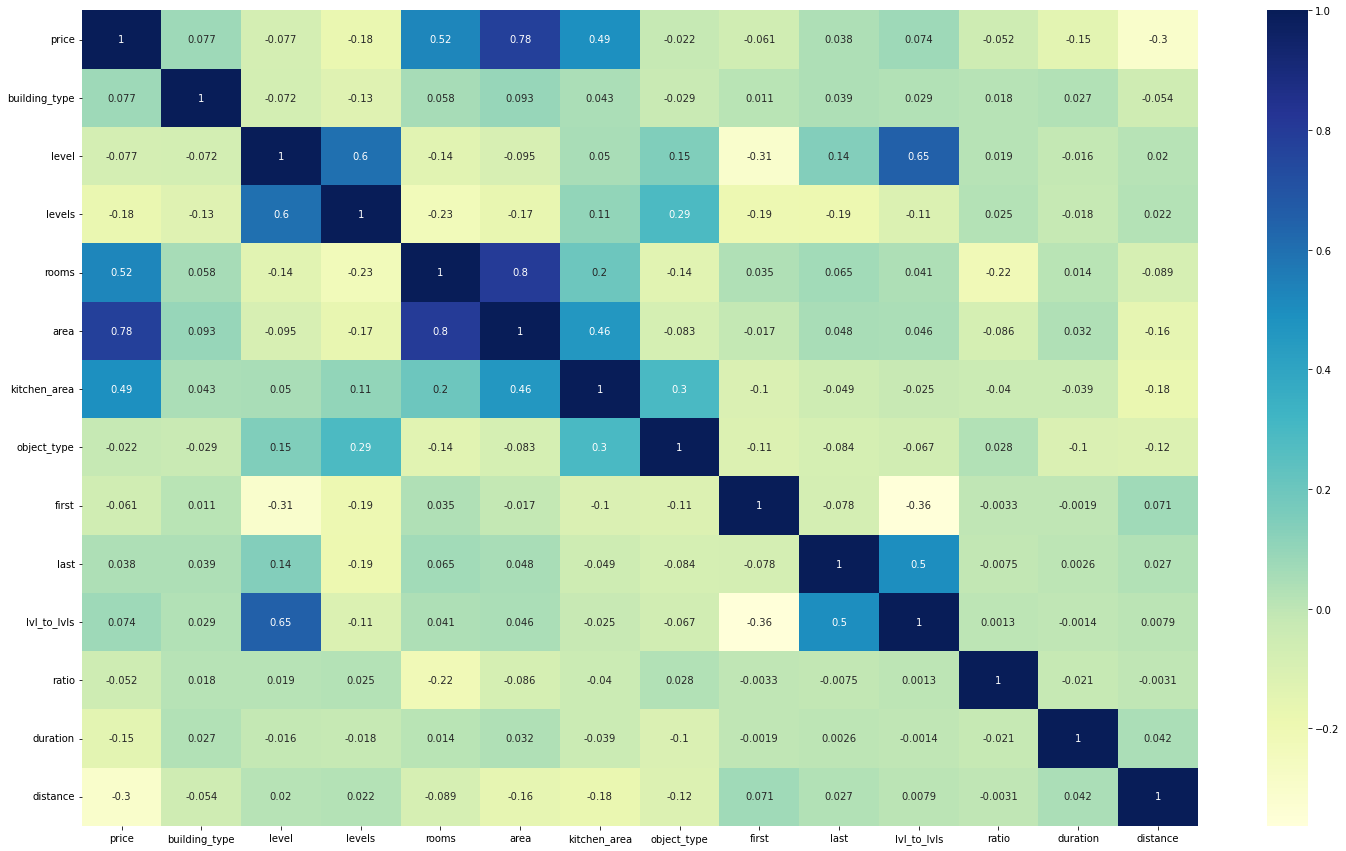

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(method='pearson'),annot=True,cmap="YlGnBu")
plt.show()

In [13]:
# кодирование категориальных переменных
encoder = ce.BinaryEncoder(cols=['building_type', 'object_type'])
df = encoder.fit_transform(df)
df

price  building_type_0  building_type_1  building_type_2  level  \
0        6050000                0                0                1      8   
1        3600000                0                0                1      2   
2        3200000                0                0                1      7   
3        6500000                0                1                0      3   
4        6300000                0                1                0      5   
...          ...              ...              ...              ...    ...   
410658   8000000                0                0                1      5   
410659  12500000                0                0                1      1   
410660  30000000                0                1                1      4   
410661   9600000                0                1                0      3   
410662   4900000                0                0                1      2   

        levels  rooms  area  kitchen_area  object_type_0  object_type_1  \
0           10      3  82.6          10.8              0              1   
1            5      1  31.1           6.0              0              1   
2            9      1  31.0           7.0              0              1   
3            3      3  89.0          10.0              0              1   
4            5      2  99.9          14.5              0              1   
...        ...    ...   ...           ...            ...            ...   
410658       9      3  60.0           6.2              0              1   
410659       9      3  67.0           6.0              0              1   
410660       8      2  92.0          21.6              0              1   
410661       6      3  62.0           8.6              0              1   
410662       5      1  31.0           6.0              0              1   

        first  last  lvl_to_lvls     ratio  duration   distance  
0           0     0     0.800000  0.130751      1167  15.199885  
1           0     0     0.400000  0.192926      1154   8.374758  
2           0     0     0.777778  0.225806      1117  13.890029  
3           0     1     1.000000  0.112360      1104  29.966317  
4           0     1     1.000000  0.145145      1099   3.433620  
...       ...   ...          ...       ...       ...        ...  
410658      0     0     0.555556  0.103333         0  10.076881  
410659      1     0     0.111111  0.089552         0  10.528965  
410660      0     0     0.500000  0.234783         0   4.142322  
410661      0     0     0.500000  0.138710         0   3.488624  
410662      0     0     0.400000  0.193548         0  10.154550  

[410663 rows x 17 columns]

In [14]:
df.reset_index(drop=True, inplace=True)

Разбиение выборки на обучающее и тестовое множество необходимо проводить таким образом, чтобы в тестовую выборку попали недавние объявления.

In [16]:
# сортировка по давности объявления
df = df.sort_values(by='duration')

In [17]:
# выделение результирующего показателя и удаление его из общей выборки
y = df['price']
df.drop(['price'], axis=1, inplace=True)

In [18]:
# разделение выборки на обучающую и тестовую

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, shuffle=False)

In [19]:
# стандартизация

scaler = StandardScaler()

# выделяем категориальные признаки
categorical = ['building_type_0', 'building_type_1', 'building_type_2', 
               'object_type_0', 'object_type_1', 'first', 'last']

# создаем датафреймы с категориальными признаками
df_cat_train = x_train[categorical]
df_cat_train.reset_index(drop=True, inplace=True)

df_cat_test = x_test[categorical]
df_cat_test.reset_index(drop=True, inplace=True)

# создаем датафреймы с числовыми признаками
numerical_train = x_train.drop(categorical, axis=1)
numerical_test = x_test.drop(categorical, axis=1)

# стандартизируем числовые признаки обучающей выборки
df_num_train = pd.DataFrame(scaler.fit_transform(numerical_train), columns = numerical_train.columns)
x_std_train = df_num_train.join(df_cat_train)

# стандартизируем числовые признаки тестовой выборки
df_num_test = pd.DataFrame(scaler.fit_transform(numerical_test), columns = numerical_test.columns)
x_std_test = df_num_test.join(df_cat_test)

### Построение линейной регрессии с L2 регуляризацией

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(x_std_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [21]:
ridge_regression.best_params_

{'alpha': 20}

In [22]:
ridge = Ridge(alpha = 20).fit(x_std_train, y_train)
reg_pred = ridge.predict(x_std_test)
reg_pred

array([ 9506964.08152215,  6906243.7413272 , 15395715.46332182, ...,
         169710.17632033,   512636.84776918,  6526106.14011575])

### Модель XGBoost

In [23]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor()

# обучение модели
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [24]:
# Прогнозирование цены на тестовой выборке
xgb_pred = xgb_r.predict(x_test)
xgb_pred

array([ 6404550.5,  4737022.5, 10793506. , ...,  3261299.8,  3407256.8,
        7288533. ], dtype=float32)

### Оценка качества

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def r2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return round(r2, 3)
    
def mae(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return round(mae, 3)    
    
def rmsle(y_true, y_pred):
    if any(x < 0 for x in y_pred):
        y_pred = [abs(i) for i in y_pred]
    rmsle = mean_squared_log_error(y_true, y_pred, squared=False)
    return round(rmsle, 3)

In [26]:
metrics = pd.DataFrame({'Ridge': [r2(y_test, reg_pred), mae(y_test, reg_pred), rmsle(y_test, reg_pred)],
                       'XGBoost': [r2(y_test, xgb_pred), mae(y_test, xgb_pred), rmsle(y_test, xgb_pred)]},
                      index=['R2', 'MAE', 'RMSLE'])
metrics

Ridge      XGBoost
R2           0.606        0.764
MAE    1934667.991  1259947.855
RMSLE        0.386        0.251

Модель XGBoost лучше по всем рассчитанным метрикам.

### Feature_importances

In [27]:
xgb_r.feature_importances_

array([0.03024323, 0.03586209, 0.06618566, 0.01490186, 0.06825177,
       0.03475491, 0.5211365 , 0.03357028, 0.03341787, 0.        ,
       0.        , 0.00902451, 0.01777069, 0.01053219, 0.05725772,
       0.06709069], dtype=float32)

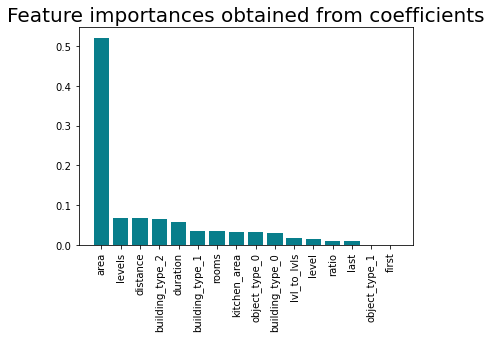

In [28]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': xgb_r.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Вывод: <br>
Наиболее важным (решающим) признаком в образовании цены на квартиру является площадь квартиры. <br>
В меньшей степени на цену квартиру влияет количество этажей и удаленность кв от центра города.

### Скоринг квартиры

In [29]:
x_test.columns

Index(['building_type_0', 'building_type_1', 'building_type_2', 'level',
       'levels', 'rooms', 'area', 'kitchen_area', 'object_type_0',
       'object_type_1', 'first', 'last', 'lvl_to_lvls', 'ratio', 'duration',
       'distance'],
      dtype='object')

In [30]:
xgb_r.predict(np.array([[0, 0, 1, 6, 9, 2, 40.4, 10.4, 1, 0, 0, 0, 6 / 9, 10.4 / 40.4, 0, 3.45]]))

array([9508500.], dtype=float32)

Вывод: <br>
Согласно построенной модели квартира, расположеннная недалеко от центра города, <br>на 6 этаже с 2 комнатами площадью 40 кв.м стоит около 9 508 500.